### Loading the required libraries

#### Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

# Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

##### 1. Read the HEPATITIS dataset

In [2]:
data = pd.read_csv("hepatitis_data.csv", na_values="?")

##### 2. Check the dimensions (rows and columns)

In [3]:
print('Dataset has ' + str(data.shape[0]) + ' rows, and ' + str(data.shape[1]) + ' columns')

Dataset has 155 rows, and 21 columns


##### 3. Check the datatype of each variable

In [4]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

## _Exploratory Data Analysis_

##### 4. Check the top 5 rows and observe the data

In [5]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,1,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,1,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,1,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,1,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,1,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 5. Check basic summary statistics of the data

In [6]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,0.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,1.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,1.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,1.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


##### 6. Check the number of unique levels in each attribute

In [7]:
data.nunique()

ID            155
target          2
age            49
gender          2
steroid         2
antivirals      2
fatigue         2
malaise         2
anorexia        2
liverBig        2
liverFirm       2
spleen          2
spiders         2
ascites         2
varices         2
bili           34
alk            83
sgot           84
albu           29
protime        44
histology       2
dtype: int64

### Target attribute distribution

##### 7. Check for value counts in target variable

In [8]:
data.target.value_counts()

1    123
0     32
Name: target, dtype: int64

##### 8. Check for distribution of values in target variable

In [9]:
data.target.value_counts(normalize=True)*100

1    79.354839
0    20.645161
Name: target, dtype: float64

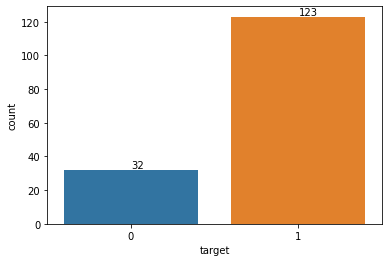

In [10]:
import seaborn as sns

y_count=sns.countplot(x='target',data=data)        
# Shows the count of observations in each categorical bin using bars

for p in y_count.patches:
    height = p.get_height()
    # Add text to the axes
    y_count.text(p.get_x()+p.get_width()/2, height + 1, height)
# The y_count.text method takes an x position, a y position and a string

## _Data Pre-processing_

##### 9. Drop column(s) which are not significant

In [11]:
data.drop(["ID"], axis = 1, inplace=True)

##### 10. Check for top 5 rows

In [12]:
print(data.shape)
data.head()

(155, 20)


,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,1,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,1,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,1,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


##### 11. Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

In [13]:
num_cols = ["age", "bili", "alk", "sgot", "protime"]
cat_cols = ['gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 
            'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']

##### 12. Convert all the categorical columns to appropriate data type 

In [14]:
data[cat_cols] = data[cat_cols].astype('category')

In [15]:
data.dtypes

target           int64
age              int64
gender        category
steroid       category
antivirals    category
fatigue       category
malaise       category
anorexia      category
liverBig      category
liverFirm     category
spleen        category
spiders       category
ascites       category
varices       category
bili           float64
alk            float64
sgot           float64
albu           float64
protime        float64
histology     category
dtype: object

##### 14. Split the data into X and y

In [16]:
X = data.drop(["target"], axis = 1)

In [17]:
y = data["target"]

In [18]:
print(X.shape, y.shape)

(155, 19) (155,)


##### 15. Split the data into X_train, X_test, y_train, y_test with test_size = 0.20

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123,stratify=y)

##### 16. Print the shape of X_train, X_test, y_train, y_test

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 19)
(31, 19)
(124,)
(31,)


##### 17. Check for distribution of target values in y_train

In [21]:
print(y_train.value_counts())

1    98
0    26
Name: target, dtype: int64


In [22]:
print(y_train.value_counts(normalize=True)*100)

1    79.032258
0    20.967742
Name: target, dtype: float64


##### 18. Check for distribution of target values in y_test

In [23]:
print(y_test.value_counts(normalize=True)*100)

1    80.645161
0    19.354839
Name: target, dtype: float64


### Handling Missing Data

##### 19. Check null values in train and test

In [24]:
# null values in train
X_train.isna().sum()

age            0
gender         0
steroid        0
antivirals     0
fatigue        0
malaise        0
anorexia       0
liverBig       7
liverFirm      8
spleen         2
spiders        2
ascites        2
varices        2
bili           4
alk           22
sgot           3
albu          11
protime       51
histology      0
dtype: int64

In [25]:
# null values in test
X_test.isna().sum()

age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig       3
liverFirm      3
spleen         3
spiders        3
ascites        3
varices        3
bili           2
alk            7
sgot           1
albu           5
protime       16
histology      0
dtype: int64

### Missing value Imputation

##### 20. Impute the Categorical Columns with mode and Numerical columns with median

In [26]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [27]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [28]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [29]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [30]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [31]:
num_imputer = SimpleImputer(strategy='median')
num_imputer.fit(df_num_train[num_cols])

SimpleImputer(strategy='median')

In [32]:
df_num_train = pd.DataFrame (num_imputer.transform(df_num_train), columns= num_cols)

In [33]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [34]:
# Combine numeric and categorical in train
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)

# Combine numeric and categorical in test
X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [44]:
X_train.shape[0],X_train.shape[1]

(124, 18)

In [45]:
X_train.isna().sum()

age           0
bili          0
alk           0
sgot          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

In [46]:
X_test.isna().sum()

age           0
bili          0
alk           0
sgot          0
protime       0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
histology     0
dtype: int64

### Encoding Categorical to Numeric -  Dummification

    'pandas.get_dummies' To convert convert categorical variable into dummy/indicator variables

#### 21. Dummify the Categorical columns

Creating dummy variables -

    If we have k levels in a category, then we create k-1 dummy variables as the last one would be redundant. So we use the parameter drop_first in pd.get_dummies function that drops the first level in each of the category

In [47]:
## Convert Categorical Columns to Dummies
# Train
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

# Test
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [48]:
X_train.columns

Index(['age', 'bili', 'alk', 'sgot', 'protime', 'gender_2.0', 'steroid_2.0',
       'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0', 'anorexia_2.0',
       'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0', 'spiders_2.0',
       'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

In [49]:
X_test.columns

Index(['age', 'bili', 'alk', 'sgot', 'protime', 'gender_2.0', 'steroid_2.0',
       'antivirals_2.0', 'fatigue_2.0', 'malaise_2.0', 'anorexia_2.0',
       'liverBig_2.0', 'liverFirm_2.0', 'spleen_2.0', 'spiders_2.0',
       'ascites_2.0', 'varices_2.0', 'histology_2.0'],
      dtype='object')

#### 22. Scale the numeric attributes ["age", "bili", "alk", "sgot", "albu", "protime"]

In [50]:
#num_cols = ["age", "bili", "alk", "sgot", "albu", "protime"]
scaler = StandardScaler()

scaler.fit(X_train[num_cols])

# scale on train
X_train[num_cols] = scaler.transform(X_train[num_cols])

# scale on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [51]:
X_train.head()

,age,bili,alk,sgot,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,1.432888,0.057593,1.494006,-0.312494,-1.545266,1,1,1,0,1,1,1,0,1,0,1,1,0
1,1.111734,2.376273,0.371980,-0.636906,-1.113288,0,0,1,0,0,1,1,1,0,1,0,1,1
2,-0.012302,-0.684384,-1.260059,-0.144280,0.367778,0,0,0,0,0,0,0,0,1,1,1,1,1
3,-1.377204,-0.035154,1.881616,0.828956,1.787134,0,1,1,0,0,0,1,1,0,1,1,1,0
4,-0.815186,-0.591637,-1.015253,-0.516753,-0.557888,0,1,0,1,1,1,1,1,1,1,1,1,0


In [52]:
X_test.head()

,age,bili,alk,sgot,protime,gender_2.0,steroid_2.0,antivirals_2.0,fatigue_2.0,malaise_2.0,anorexia_2.0,liverBig_2.0,liverFirm_2.0,spleen_2.0,spiders_2.0,ascites_2.0,varices_2.0,histology_2.0
0,2.155483,0.150340,1.575608,-0.144280,-0.064199,1,0,1,0,0,1,1,1,1,1,1,1,0
1,0.148274,-0.313396,-0.342037,-0.805119,2.404245,0,0,1,1,1,1,1,1,1,1,1,1,0
2,1.111734,-0.313396,1.085997,1.730101,0.367778,0,0,0,1,1,1,0,0,1,1,1,1,1
3,-1.056051,-0.498890,-0.342037,-0.516753,-0.064199,0,1,1,1,1,1,1,1,1,1,1,1,0
4,-0.092591,-0.313396,-0.342037,-0.733028,-0.064199,0,1,1,1,1,1,1,1,1,1,1,1,0


## MODEL BUILDING